## SI 670 Applied Machine Learning, Week 6:  Naive Bayes, Pipeline, High Dimension, Density Estimation. (Due 10/31 11:59pm)

For this assignment, each question is worth 20 points, for a total of 60 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file AND corresponding **HTML** file to the Canvas site.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.


### Put your name here: Huan Zhao

### Put your uniquename here: huanzhao

### Question 1 (20 points)

Please write the answers as well as your derivation process of the following questions. You can use either LaTeX or python code to represent your answer. For example, if you want to present <$x_1^2$>, in the LaTeX format you should write <(dollar sign) x_1^2 (dollar sign)>; in the python code format you should write <\`x_1\*\*2\`>. See [here](https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/) for how to represent more mathmatical symbols in LaTeX format.

**Calculate the unnormalized posterior probability of a naive Bayes classifier**

Suppose you have a dataset with 2 features $X_1, X_2$ and a binary label $Y$. $X_1$ and $Y$ takes value either 0 or 1. $X_2$ takes one out of the three possible values $0, 1$, or $2$.

Based on the dataset, you know 

$p(Y=0) = 0.05$, 

$p(X_1=0 | Y=0) = 0.6$, $p(X_1=0 | Y=1) = 0.3$, 

$p(X_2=0 | Y=0) = 0.9$, $p(X_2=1 | Y=0) = 0.05$, $p(X_2=0 | Y=1) = 0.1$, $p(X_2=1 | Y=1) = 0.3$. 

Please calculate the unnormalized posterior probability of a naive Bayes classifier: 
$$\hat{p}(Y=1 | X) = p(X | Y=1) p(Y=1)$$ and $$\hat{p}(Y=0 | X) = p(X | Y=0) p(Y=0)$$ of the following data points.

#### (a) (10 points) $X_1 = 1, X_2 = 0$



#### (b) (10 points) $X_1 = 0, X_2 = 2$



### Answer 1

(a)
${p}(Y=1) = 1-{p}(Y=0)=1-0.05=0.95$  
${p}(X_1=1 | Y=1) = 1-{p}(X_1=0 | Y=1)=1-0.3=0.7$  
$p(X_2=0 | Y=1) = 0.1$  

$\hat{p}(Y=1 | X) = p(X | Y=1) p(Y=1)$  
$= p(X_1=1,X_2=0 | Y=1) p(Y=1)$  
$=0.7*0.1*0.95=0.0665$  

$p(X_2=2 | Y=0)$  
$=1-(p(X_2=0 | Y=0)+p(X_2=1 | Y=0))$  
$=1-0.95=0.05$  


$\hat{p}(Y=0 | X) = p(X | Y=0) p(Y=0)$  
$= p(X_1=1,X_2=0 | Y=0) p(Y=0)$  
$=(1-0.6)*0.95*0.05$
$=0.019$  



(b)
$\hat{p}(Y=1 | X) = p(X | Y=1) p(Y=1)$
$= p(X_1=0,X_2=2 | Y=1) p(Y=1)$ 
$=0.3*(1-0.1+0.3)*0.95=0.342$  

$\hat{p}(Y=0 | X) = p(X | Y=0) p(Y=0)$ 
$= p(X_1=0,X_2=2 | Y=0) p(Y=0)$ 
$= 0.6*0.05*0.05$
$=0.0015$


### Question 2 (20 points)

The bandwidth is an important hyper-parmeter in the kernel density estimation. This question asks you to use `GridSearchCV` with `cv=5` to search the best `bandwidth` for a `KernelDensity` estimator with Gaussian kernel on `X_train`. Then test the estimator with the best bandwidth parameter on `X_test` (use the `.score()` function of the `KernelDensity` estimator the get the test score). 

Return a tuple of two numbers `(best_bandwidth, test_score)`. 

The grid search range of the parameter is given in `param_grid`.

*Tip1: The test score of the `KernelDensity` is log probability density and it's always negative. Don't be surprised.*

*Tip2: We also provide a plot_kde function for you to visualize the kernel density estimation with different bandwidths. You can have a check whether the best bandwidth parameter got by your grid search makes sense.*

In [2]:
def answer_two():
    import numpy as np
    from sklearn.model_selection import GridSearchCV
    from sklearn.neighbors import KernelDensity

    N = 100
    np.random.seed(1)
    X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                        np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

    indices = list(range(N))
    np.random.shuffle(indices)
    X_train = X[indices[:N//2]]
    X_test = X[indices[N//2:]]
    
    
    param_grid = {"bandwidth": [0.1, 0.3, 0.5, 1., 1.5]}
    gsearch = GridSearchCV(KernelDensity(kernel='gaussian'),param_grid,cv=5)
    gsearch.fit(X_train)
    best_bandwidth=gsearch.best_params_['bandwidth']
    test_score = gsearch.score(X_test)
    
    return best_bandwidth, test_score

answer_two()

(0.5, -95.62815084444804)

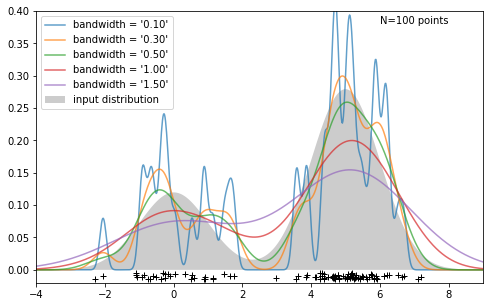

In [3]:
def visualize_kde():
    %matplotlib inline
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    from sklearn.neighbors import KernelDensity

    N = 100
    np.random.seed(1)
    X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                        np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

    indices = list(range(N))
    np.random.shuffle(indices)
    X_train = X[indices[:N//2]]
    X_test = X[indices[N//2:]]

    X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

    true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
                 + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
            label='input distribution')

    for bandwidth in [0.1, 0.3, 0.5, 1., 1.5]:
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X_train)
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-', alpha=0.7,
                label="bandwidth = '{:.2f}'".format(bandwidth))


    ax.text(6, 0.38, "N={0} points".format(N))

    ax.legend(loc='upper left')
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-4, 9)
    ax.set_ylim(-0.02, 0.4)
    plt.show()
    
visualize_kde()

### Question 3 (20 points)

Build a pipeline that first applies the MinMaxScaler to the data and then grid searches the hyper-parameter `C` of the `LinearSVC` classifier. Note the whole process should be wrapped in a single pipeline.

Return a tuple `(pipe, test_score)`, where `pipe` is the pipeline object you build and `test_score` is the accuracy score you get from your final model on `(X_test, y_test)`.

The grid search range of the parameter is given in `param_grid`.

*Hint1: The `GridSearchCV` itself can be viewed as a classifier or a regressor because it implements `.fit` and `.score` functions.*

*Hint2: There are two ways to combine `GridSearchCV` and `Pipeline`: you can either grid search a pipeline with the scaler and the classifier; or you can pipeline the scaler and the "grid-search classifier". This question requires you to implement the latter one. Think about which way is more computationally efficient?*

In [5]:
def answer_three():
    from sklearn.pipeline import Pipeline
    from sklearn.svm import LinearSVC
    from sklearn.datasets import load_breast_cancer
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split

    (X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
    X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

    param_grid = {"C": [0.1, 1, 10, 100]}
    
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()),('clf', GridSearchCV(LinearSVC(), param_grid))])
    pipe.fit(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    return pipe, test_score

answer_three()

C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Huan Zhao\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converg

(Pipeline(memory=None,
          steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                 ('clf',
                  GridSearchCV(cv='warn', error_score='raise-deprecating',
                               estimator=LinearSVC(C=1.0, class_weight=None,
                                                   dual=True, fit_intercept=True,
                                                   intercept_scaling=1,
                                                   loss='squared_hinge',
                                                   max_iter=1000,
                                                   multi_class='ovr',
                                                   penalty='l2',
                                                   random_state=None, tol=0.0001,
                                                   verbose=0),
                               iid='warn', n_jobs=None,
                               param_grid={'C': [0.1, 1, 10, 100]},
                           